# <center>Metody Numeryczne</center>

# Laboratorium 8: Rozwiązywanie równań nieliniowych


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest poznanie numerycznych metod rozwiązywania układów równań nieliniowych. W ramach laboratorium przedstawione zostaną metody: [*bisekcji*](https://www.wikiwand.com/pl/articles/Metoda_r%C3%B3wnego_podzia%C5%82u), [*siecznych*](https://www.wikiwand.com/pl/articles/Metoda_siecznych) oraz [*Newtona*](https://www.wikiwand.com/pl/articles/Metoda_Newtona).

Tematem wiodącym podczas tych zajęć będzie poszukiwanie miejsc zerowych funkcji zdefiniowanej w następujący sposób: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$

Funkcja $f(x)$ oraz jej pierwsza i druga pochodna ($f'(x)$, $f''(x)$) zostały zaimplementowane w pliku `main.py`, odpowiednio jako `func()`, `dfunc()` i `ddfunc()`.

### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

1. Zaprezentuj na jednym wykresie przebieg funkcji $f(x)$, $f'(x)$ oraz $f''(x)$, w taki sposób, aby na podstawie rysunku można było zgrubnie określić położenie miejsc zerowych funkcji.

2. Na podstawie analizy wykresu określ przedziały, w których znajdują się miejsca zerowe funkcji $f(x)$.

3. Odpowiedz w jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji.


<function matplotlib.pyplot.show(close=None, block=None)>

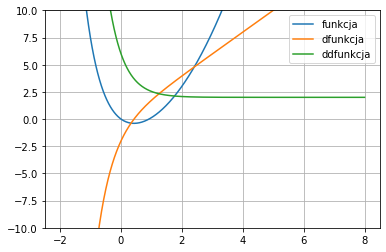

In [ ]:
# ===== Twoja implementacja tutaj =====
import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

x =np.linspace(-2,8,1000)
funkcja=main.func(x)
dfunkcja=main.dfunc(x)
ddfunkcja=main.ddfunc(x)    

plt.plot(x,funkcja)
plt.plot(x,dfunkcja)
plt.plot(x,ddfunkcja)
plt.grid()
plt.ylim([-10,10])
plt.legend(['funkcja','dfunkcja','ddfunkcja']) 
plt.show



## Miejsca zerowe funkcji znajdują się w przedziale około od 0 do 1.5
##Pierwsza pochodna pozwala zastosować metodę Newtona, która szybko zbiega do pierwiastka 
## Druga pochodna określa wypukłość funkcji i pozwala dobrać odpowiedni punkt co daje zbieżność metody

---

### **Zadanie 2.**

Najprostszą metodą do wyznaczenia miejsc zerowych funkcji nieliniowej jest [metoda bisekcji](https://en.wikipedia.org/wiki/Bisection_method). 

Zaimplementuj funkcję *`bisection()`* pamiętając, że gwarancją zbieżności metody bisekcji dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

In [ ]:
a,b = -0.1,0.2
epsilon = 1e-10
max_iter = 100

root, iters = main.bisection(a, b, main.func, epsilon, max_iter)

print(f"Przedział: [{a}, {b}]")
print(f"Znalezione miejsce zerowe: {root}")
print(f"Liczba iteracji: {iters}")
print(f"Dokładność ={abs(main.func(root))}")

Przedział: [-0.1, 0.2]
Znalezione miejsce zerowe: 4.656612873077393e-11
Liczba iteracji: 31
Dokładność |f(root)| = 9.313227966600834e-11


---

### **Zadanie 3.**

Bardziej zaawansowaną metodą wyznaczania miejsc zerowych jest [metoda siecznych](https://en.wikipedia.org/wiki/Secant_method), która stanowi rozwinięcie [metody Regula Falsi](https://en.wikipedia.org/wiki/Regula_falsi).

Zaimplementuj funkcję *`secant()`* pamiętając, że gwarancją zbieżności metody siecznych dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.


In [ ]:
a, b = -0.1, 0.2
epsilon = 1e-10
max_iter = 100

root, iters = main.secant(a, b, main.func, epsilon, max_iter)

print(f"Przedział: [{a}, {b}]")
print(f"Znalezione miejsce zerowe: {root}")
print(f"Liczba iteracji: {iters}")
print(f"Dokładność ={abs(main.func(root))}")

===== Pokazowe użycie funkcji secant =====
Przedział: [-0.1, 0.2]
Znalezione miejsce zerowe: 9.897554997806424e-12
Liczba iteracji: 12
Dokładność |f(root)| = 1.9795054484461616e-11


---

### **Zadanie 4.**

Inną metodą, wykorzystywaną do poszukiwania miejsc zerowych funkcji, jest [metoda Newtona](https://en.wikipedia.org/wiki/Newton%27s_method), nazywana również metodą stycznych.

**Podpunkt 1.**

Algorytm metody Newtona wykorzystuje wartości pierwszej pochodnej, dlatego przed przystąpieniem do jej implementacji przygotuj pomocniczą funkcję *`difference_quotient()`*, służącą do wyznaczenia wartości ilorazu różnicowego.

<br>

**Podpunkt 2.**

Zaimplementuj funkcję *`newton()`* pamiętając, że gwarancją zbieżności metody Newtona dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.

In [31]:
a, b = -0.1, 0.2
epsilon = 1e-10
max_iter = 100

root, iters = main.newton(main.func,main.dfunc,main.ddfunc,a,b,epsilon,max_iter)
print(f"Przedział: [{a}, {b}]")
print(f"Znalezione miejsce zerowe: {root}")
print(f"Liczba iteracji: {iters}")
print(f"Dokładność ={abs(main.func(root))}")

Przedział: [-0.1, 0.2]
Znalezione miejsce zerowe: -8.751439246597074e-15
Liczba iteracji: 4
Dokładność =1.7541523789077473e-14


---

### **Zadanie 5.**

Dla funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć** znajdź miejsca zerowe przy użyciu:

- funkcji [`sp.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
- funkcji [`sp.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

In [ ]:
# ===== Twoja implementacja tutaj =====

import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

x1 = -1
x2 = 1

x1_root = sp.optimize.root(main.func,x1).x
x2_root = sp.optimize.root(main.func,x2).x

x1_fsolve = sp.optimize.fsolve(main.func,x1)
x2_fsolve = sp.optimize.fsolve(main.func,x2)

print("sp.optimize.root():" ,x1_root, x2_root)
print("sp.optimize.fsolve():", x1_fsolve, x2_fsolve)


sp.optimize.root(): [-2.1736944e-17] [0.91656258]
sp.optimize.fsolve(): [-2.1736944e-17] [0.91656258]


---

### **Zadanie 6.**

Korzystając z przedziałów wyznaczonych w **Zadaniu 1.** znajdź miejsca zerowe funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć**, przy użyciu:

- metody bisekcji,
- metody siecznych,
- metody Newtona,

z tolerancją równą $1\mathrm{e}{-10}$.

Zbadaj dokładność (względem rozwiązania z **Zadania 5.**) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

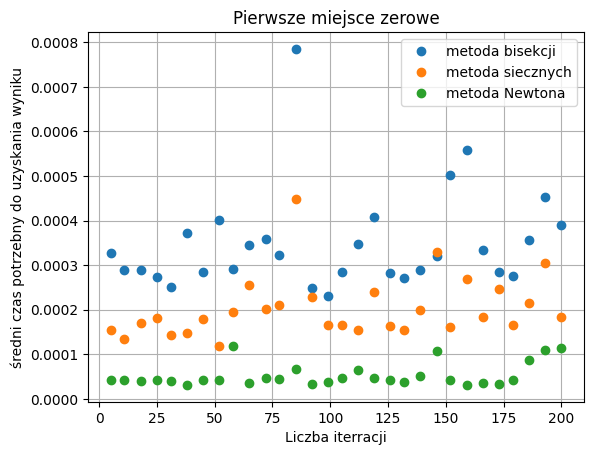

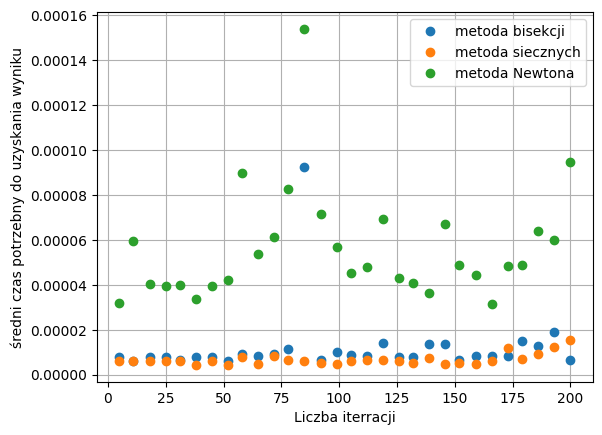

In [ ]:
# ===== Twoja implementacja tutaj =====

import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import timeit

x1_range = [-0.1,0.2]
x2_range = [0.6, 0.9]

epsilon = 1e-10
max_iter = 200


iteration_lst = np.linspace(5, 200, 30, dtype=int)

time_bisection_x1 = []
time_secant_x1 = []
time_newton_x1 = []

time_bisection_x2 = []
time_secant_x2 = []
time_newton_x2 = []


powtorzenia=5
for iterations in iteration_lst:
    time1 = %timeit -r 5 -n 10 -q -o main.bisection(x1_range[0], x1_range[1], main.func, epsilon, max_iter)
    time_bisection_x1.append(time1.average)

    time2 = %timeit -r 5 -n 10 -q -o main.bisection(x2_range[0], x2_range[1], main.func, epsilon, max_iter)
    time_bisection_x2.append(time2.average)

    time3 = %timeit -r 5 -n 10 -q -o main.secant(x1_range[0], x1_range[1], main.func, epsilon, max_iter)
    time_secant_x1.append(time3.average)

    time4 = %timeit -r 5 -n 10 -q -o main.secant(x2_range[0], x2_range[1], main.func, epsilon, max_iter)
    time_secant_x2.append(time4.average)

    time5 = %timeit -r 5 -n 10 -q -o main.newton(main.func, main.dfunc, main.ddfunc, x1_range[0], x1_range[1], epsilon, max_iter)
    time_newton_x1.append(time5.average)

    time6 = %timeit -r 5 -n 10 -q -o main.newton(main.func, main.dfunc, main.ddfunc, x1_range[0], x1_range[1], epsilon, max_iter)
    time_newton_x2.append(time6.average)



plt.plot(iteration_lst, time_bisection_x1, 'o', label='metoda bisekcji')
plt.plot(iteration_lst, time_secant_x1, 'o', label='metoda siecznych')
plt.plot(iteration_lst, time_newton_x1, 'o', label='metoda Newtona')
plt.title('Pierwszy pierwiastek funkcji')
plt.xlabel('Iteracje')
plt.ylabel('średni czas potrzebny do uzyskania wyniku')
plt.legend()
plt.grid()
plt.show()
plt.plot(iteration_lst, time_bisection_x2, 'o', label='metoda bisekcji')
plt.plot(iteration_lst, time_secant_x2, 'o', label='metoda siecznych')
plt.plot(iteration_lst, time_newton_x2, 'o', label='metoda Newtona')
plt.title('Drugi pierwiastek funkcji')
plt.xlabel('Iteracje')
plt.ylabel('średni czas potrzebny do uzyskania wyniku')
plt.legend()
plt.grid()
plt.show()


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)